CSC 369 2.0 Machine Learning I - Assignment / 
A.N.Sandaruwani / 
AS2019528

# Multi-layer neural network to predict price range of a mobile phone

In [390]:
#Import packages.
import tensorflow as tf
import keras
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
data = pd.read_csv('Mobile_Dataset.csv') #Import the data (csv file).

In [392]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [393]:
dataset=data.values #Store the array of values of 'data' into the variable ‘dataset’.

In [394]:
dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [395]:
#Split the dataset into input features (X) and the feature we wish to predict (Y).
X=dataset[:,0:20]
Y=dataset[:,20]

In [396]:
#Pre-processing data.
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [397]:
#Split the dataset into a training set and a testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.2)

In [398]:
#Show shapes of the arrays for each of them.
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1600, 20) (400, 20) (1600,) (400,)


In [399]:
#Import functions for building and training neural network.
from keras.models import Sequential
from keras.layers import Dense

In [370]:
#Import functions needed for L2 regularization and dropout to reduce over-fitting.
from keras.layers import Dropout
from keras import regularizers

In [371]:
#Define the architecture.
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(20,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
])

The neural network has 3 layers where each hidden layer has 32 neurons and output layer has 4 neurons.

In [372]:
#Configure the model.
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [376]:
#Training on the data.
model_history=model.fit(X_train,Y_train,batch_size=64,epochs=1000, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2592 - accuracy: 0.5875 - val_loss: 1.1897 - val_accuracy: 0.7250
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2421 - accuracy: 0.6069 - val_loss: 1.1815 - val_accuracy: 0.7300
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2390 - accuracy: 0.6012 - val_loss: 1.1764 - val_accuracy: 0.7450
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2282 - accuracy: 0.6181 - val_loss: 1.1668 - val_accuracy: 0.7425
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.2239 - accuracy: 0.6131 - val_loss: 1.1604 - val_accuracy: 0.7500
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2253 - accuracy: 0.6225 - val_loss: 1.1533 - val_accuracy: 0.7525
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.2248 - accuracy: 0.6037 - val_loss: 1.1468 - val_accuracy: 0.7475
Epoch 

25/25 [==============================] - 0s 4ms/step - loss: 1.0104 - accuracy: 0.7412 - val_loss: 0.9217 - val_accuracy: 0.8650
Epoch 59/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0020 - accuracy: 0.7381 - val_loss: 0.9213 - val_accuracy: 0.8675
Epoch 60/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0041 - accuracy: 0.7256 - val_loss: 0.9181 - val_accuracy: 0.8650
Epoch 61/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0113 - accuracy: 0.7237 - val_loss: 0.9136 - val_accuracy: 0.8700
Epoch 62/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9940 - accuracy: 0.7444 - val_loss: 0.9135 - val_accuracy: 0.8650
Epoch 63/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.7450 - val_loss: 0.9103 - val_accuracy: 0.8700
Epoch 64/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.9981 - accuracy: 0.7362 - val_loss: 0.9084 - val_accuracy: 0.8700
Epoch 65/1000

25/25 [==============================] - 0s 3ms/step - loss: 0.9122 - accuracy: 0.7769 - val_loss: 0.8107 - val_accuracy: 0.9125
Epoch 116/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9018 - accuracy: 0.7869 - val_loss: 0.8103 - val_accuracy: 0.9175
Epoch 117/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9008 - accuracy: 0.7881 - val_loss: 0.8082 - val_accuracy: 0.9150
Epoch 118/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9019 - accuracy: 0.7756 - val_loss: 0.8101 - val_accuracy: 0.9125
Epoch 119/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.7925 - val_loss: 0.8043 - val_accuracy: 0.9225
Epoch 120/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9060 - accuracy: 0.7781 - val_loss: 0.8042 - val_accuracy: 0.9200
Epoch 121/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9047 - accuracy: 0.7725 - val_loss: 0.8021 - val_accuracy: 0.9250
Epoch 1

Epoch 172/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.8558 - accuracy: 0.8062 - val_loss: 0.7604 - val_accuracy: 0.9375
Epoch 173/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.8570 - accuracy: 0.8112 - val_loss: 0.7621 - val_accuracy: 0.9300
Epoch 174/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8619 - accuracy: 0.8006 - val_loss: 0.7611 - val_accuracy: 0.9350
Epoch 175/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8568 - accuracy: 0.8069 - val_loss: 0.7605 - val_accuracy: 0.9325
Epoch 176/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8507 - accuracy: 0.8069 - val_loss: 0.7612 - val_accuracy: 0.9275
Epoch 177/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8594 - accuracy: 0.7825 - val_loss: 0.7572 - val_accuracy: 0.9325
Epoch 178/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8580 - accuracy: 0.7994 - val_loss: 0.7568 - val_accuracy:

Epoch 229/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8286 - accuracy: 0.8106 - val_loss: 0.7346 - val_accuracy: 0.9425
Epoch 230/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.7987 - val_loss: 0.7369 - val_accuracy: 0.9475
Epoch 231/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.8156 - val_loss: 0.7359 - val_accuracy: 0.9425
Epoch 232/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8241 - accuracy: 0.8175 - val_loss: 0.7364 - val_accuracy: 0.9375
Epoch 233/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8185 - accuracy: 0.8156 - val_loss: 0.7343 - val_accuracy: 0.9450
Epoch 234/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8305 - accuracy: 0.8094 - val_loss: 0.7311 - val_accuracy: 0.9425
Epoch 235/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8356 - accuracy: 0.8106 - val_loss: 0.7322 - val_accuracy:

Epoch 286/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8240 - accuracy: 0.8181 - val_loss: 0.7194 - val_accuracy: 0.9450
Epoch 287/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.8138 - val_loss: 0.7183 - val_accuracy: 0.9500
Epoch 288/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.8100 - val_loss: 0.7264 - val_accuracy: 0.9275
Epoch 289/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7997 - accuracy: 0.8381 - val_loss: 0.7182 - val_accuracy: 0.9500
Epoch 290/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8155 - accuracy: 0.8156 - val_loss: 0.7174 - val_accuracy: 0.9575
Epoch 291/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8095 - accuracy: 0.8250 - val_loss: 0.7180 - val_accuracy: 0.9550
Epoch 292/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.8037 - val_loss: 0.7213 - val_accuracy:

Epoch 343/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.7928 - accuracy: 0.8331 - val_loss: 0.7107 - val_accuracy: 0.9500
Epoch 344/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8012 - accuracy: 0.8250 - val_loss: 0.7104 - val_accuracy: 0.9475
Epoch 345/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8102 - accuracy: 0.8169 - val_loss: 0.7142 - val_accuracy: 0.9400
Epoch 346/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.7953 - accuracy: 0.8300 - val_loss: 0.7112 - val_accuracy: 0.9475
Epoch 347/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8052 - accuracy: 0.8181 - val_loss: 0.7158 - val_accuracy: 0.9350
Epoch 348/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8022 - accuracy: 0.8338 - val_loss: 0.7087 - val_accuracy: 0.9575
Epoch 349/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8021 - accuracy: 0.8225 - val_loss: 0.7087 - val_accuracy:

Epoch 400/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7961 - accuracy: 0.8281 - val_loss: 0.7054 - val_accuracy: 0.9575
Epoch 401/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7943 - accuracy: 0.8394 - val_loss: 0.7038 - val_accuracy: 0.9500
Epoch 402/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.8231 - val_loss: 0.7044 - val_accuracy: 0.9525
Epoch 403/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.8388 - val_loss: 0.7042 - val_accuracy: 0.9575
Epoch 404/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7930 - accuracy: 0.8275 - val_loss: 0.7043 - val_accuracy: 0.9575
Epoch 405/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7951 - accuracy: 0.8363 - val_loss: 0.7108 - val_accuracy: 0.9275
Epoch 406/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.8319 - val_loss: 0.7059 - val_accuracy:

Epoch 457/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7878 - accuracy: 0.8356 - val_loss: 0.7015 - val_accuracy: 0.9475
Epoch 458/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7967 - accuracy: 0.8275 - val_loss: 0.7020 - val_accuracy: 0.9525
Epoch 459/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7839 - accuracy: 0.8425 - val_loss: 0.6992 - val_accuracy: 0.9625
Epoch 460/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7840 - accuracy: 0.8444 - val_loss: 0.7040 - val_accuracy: 0.9375
Epoch 461/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7887 - accuracy: 0.8263 - val_loss: 0.7024 - val_accuracy: 0.9500
Epoch 462/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.8194 - val_loss: 0.7010 - val_accuracy: 0.9575
Epoch 463/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7972 - accuracy: 0.8313 - val_loss: 0.7026 - val_accuracy:

Epoch 514/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7934 - accuracy: 0.8394 - val_loss: 0.6967 - val_accuracy: 0.9550
Epoch 515/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7943 - accuracy: 0.8325 - val_loss: 0.6968 - val_accuracy: 0.9575
Epoch 516/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7791 - accuracy: 0.8319 - val_loss: 0.6988 - val_accuracy: 0.9525
Epoch 517/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7887 - accuracy: 0.8313 - val_loss: 0.6975 - val_accuracy: 0.9525
Epoch 518/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7764 - accuracy: 0.8325 - val_loss: 0.7033 - val_accuracy: 0.9300
Epoch 519/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7910 - accuracy: 0.8275 - val_loss: 0.6992 - val_accuracy: 0.9525
Epoch 520/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7859 - accuracy: 0.8356 - val_loss: 0.6982 - val_accuracy:

Epoch 571/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7773 - accuracy: 0.8519 - val_loss: 0.6963 - val_accuracy: 0.9525
Epoch 572/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.8400 - val_loss: 0.6974 - val_accuracy: 0.9475
Epoch 573/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7817 - accuracy: 0.8406 - val_loss: 0.6959 - val_accuracy: 0.9550
Epoch 574/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7858 - accuracy: 0.8469 - val_loss: 0.6942 - val_accuracy: 0.9500
Epoch 575/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7798 - accuracy: 0.8406 - val_loss: 0.6952 - val_accuracy: 0.9525
Epoch 576/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7781 - accuracy: 0.8331 - val_loss: 0.6953 - val_accuracy: 0.9575
Epoch 577/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7913 - accuracy: 0.8338 - val_loss: 0.6982 - val_accuracy:

Epoch 628/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7767 - accuracy: 0.8425 - val_loss: 0.6928 - val_accuracy: 0.9500
Epoch 629/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7702 - accuracy: 0.8550 - val_loss: 0.6956 - val_accuracy: 0.9425
Epoch 630/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7683 - accuracy: 0.8550 - val_loss: 0.6924 - val_accuracy: 0.9525
Epoch 631/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7826 - accuracy: 0.8400 - val_loss: 0.6947 - val_accuracy: 0.9425
Epoch 632/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7755 - accuracy: 0.8406 - val_loss: 0.6924 - val_accuracy: 0.9525
Epoch 633/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7793 - accuracy: 0.8456 - val_loss: 0.6931 - val_accuracy: 0.9500
Epoch 634/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7660 - accuracy: 0.8531 - val_loss: 0.6923 - val_accuracy:

Epoch 685/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7814 - accuracy: 0.8400 - val_loss: 0.6919 - val_accuracy: 0.9575
Epoch 686/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7943 - accuracy: 0.8244 - val_loss: 0.6923 - val_accuracy: 0.9525
Epoch 687/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7840 - accuracy: 0.8331 - val_loss: 0.6931 - val_accuracy: 0.9575
Epoch 688/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7832 - accuracy: 0.8400 - val_loss: 0.6991 - val_accuracy: 0.9325
Epoch 689/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7881 - accuracy: 0.8319 - val_loss: 0.6942 - val_accuracy: 0.9475
Epoch 690/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7796 - accuracy: 0.8469 - val_loss: 0.6915 - val_accuracy: 0.9600
Epoch 691/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7703 - accuracy: 0.8400 - val_loss: 0.6911 - val_accuracy:

Epoch 742/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7688 - accuracy: 0.8438 - val_loss: 0.6888 - val_accuracy: 0.9550
Epoch 743/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.8450 - val_loss: 0.6919 - val_accuracy: 0.9500
Epoch 744/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7740 - accuracy: 0.8481 - val_loss: 0.6900 - val_accuracy: 0.9525
Epoch 745/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7714 - accuracy: 0.8431 - val_loss: 0.6886 - val_accuracy: 0.9575
Epoch 746/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7820 - accuracy: 0.8331 - val_loss: 0.6932 - val_accuracy: 0.9450
Epoch 747/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.8462 - val_loss: 0.6910 - val_accuracy: 0.9500
Epoch 748/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7878 - accuracy: 0.8350 - val_loss: 0.6920 - val_accuracy:

Epoch 799/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7739 - accuracy: 0.8338 - val_loss: 0.6897 - val_accuracy: 0.9550
Epoch 800/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7652 - accuracy: 0.8481 - val_loss: 0.6886 - val_accuracy: 0.9525
Epoch 801/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7738 - accuracy: 0.8388 - val_loss: 0.6908 - val_accuracy: 0.9550
Epoch 802/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7710 - accuracy: 0.8394 - val_loss: 0.6888 - val_accuracy: 0.9525
Epoch 803/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7623 - accuracy: 0.8581 - val_loss: 0.6906 - val_accuracy: 0.9475
Epoch 804/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7741 - accuracy: 0.8481 - val_loss: 0.6885 - val_accuracy: 0.9525
Epoch 805/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7806 - accuracy: 0.8381 - val_loss: 0.6936 - val_accuracy:

Epoch 856/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7699 - accuracy: 0.8519 - val_loss: 0.6889 - val_accuracy: 0.9550
Epoch 857/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.8300 - val_loss: 0.6902 - val_accuracy: 0.9475
Epoch 858/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7697 - accuracy: 0.8475 - val_loss: 0.6881 - val_accuracy: 0.9525
Epoch 859/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7710 - accuracy: 0.8413 - val_loss: 0.6869 - val_accuracy: 0.9525
Epoch 860/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.8481 - val_loss: 0.6862 - val_accuracy: 0.9575
Epoch 861/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7812 - accuracy: 0.8331 - val_loss: 0.6883 - val_accuracy: 0.9500
Epoch 862/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7682 - accuracy: 0.8462 - val_loss: 0.6871 - val_accuracy:

Epoch 913/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.8506 - val_loss: 0.6873 - val_accuracy: 0.9525
Epoch 914/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.8556 - val_loss: 0.6853 - val_accuracy: 0.9625
Epoch 915/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7781 - accuracy: 0.8537 - val_loss: 0.6852 - val_accuracy: 0.9550
Epoch 916/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.8400 - val_loss: 0.6856 - val_accuracy: 0.9575
Epoch 917/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7622 - accuracy: 0.8550 - val_loss: 0.6884 - val_accuracy: 0.9550
Epoch 918/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7634 - accuracy: 0.8500 - val_loss: 0.6859 - val_accuracy: 0.9525
Epoch 919/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7716 - accuracy: 0.8444 - val_loss: 0.6849 - val_accuracy:

Epoch 970/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7768 - accuracy: 0.8375 - val_loss: 0.6852 - val_accuracy: 0.9500
Epoch 971/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7675 - accuracy: 0.8519 - val_loss: 0.6843 - val_accuracy: 0.9550
Epoch 972/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.8581 - val_loss: 0.6839 - val_accuracy: 0.9550
Epoch 973/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7747 - accuracy: 0.8475 - val_loss: 0.6842 - val_accuracy: 0.9525
Epoch 974/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7699 - accuracy: 0.8425 - val_loss: 0.6848 - val_accuracy: 0.9550
Epoch 975/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7702 - accuracy: 0.8394 - val_loss: 0.6855 - val_accuracy: 0.9575
Epoch 976/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.8500 - val_loss: 0.6872 - val_accuracy:

In [377]:
model.predict(X_test) #Predict the outputs.      

13/13 [==============================] - 0s 1ms/step


array([[9.2461795e-01, 7.4698396e-02, 6.8340049e-04, 2.5725538e-07],
       [3.0458707e-01, 6.2543517e-01, 6.9494240e-02, 4.8343270e-04],
       [2.4658642e-04, 6.1730031e-02, 5.9765619e-01, 3.4036726e-01],
       ...,
       [2.9548579e-05, 1.5932463e-02, 3.4301445e-01, 6.4102364e-01],
       [9.1822624e-01, 8.0925040e-02, 8.4819045e-04, 3.9732902e-07],
       [4.7630281e-05, 2.3091417e-02, 4.1473490e-01, 5.6212610e-01]],
      dtype=float32)

In [378]:
#Evaluate the model on the test data set([Loss, Accuracy]
model.evaluate(X_test, Y_test) 

13/13 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.9550


[0.6846394538879395, 0.9549999833106995]

In [379]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

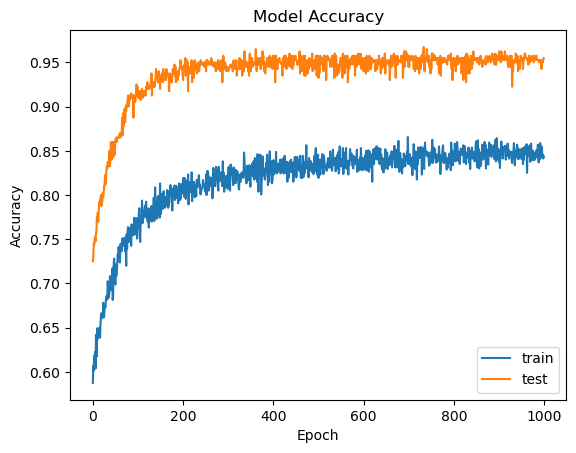

In [380]:
#Visualize training and testing acuuracy.
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

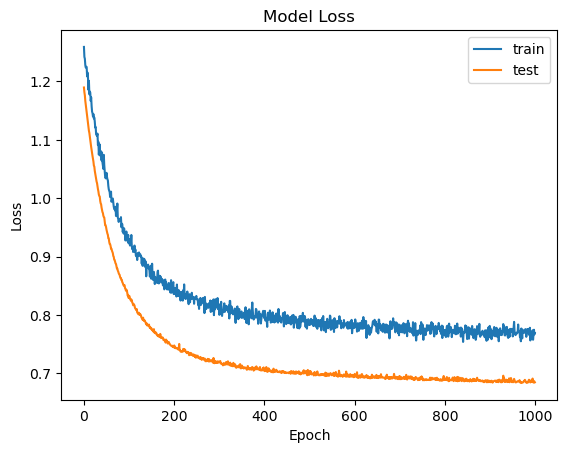

In [381]:
#Visualize training and testing loss.
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')

# K-nearest neighbour algorithm to predict price range of a mobile phone

In [400]:
#Importing packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [401]:
#Importing the data set.
data = pd.read_csv('Mobile_Dataset.csv')

In [402]:
#Preprocessing data(Standardizing).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Create an instance of the StandardScaler class named 'scaler'.
scaler.fit(data.drop('price_range', axis=1)) #Train the instance on the data set
scaled_features = scaler.transform(data.drop('price_range', axis=1)) #Standardize all of the features in the data set and assign the scaled features to the variable named 'scaled_features'.
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('price_range', axis=1).columns) #Convert NumPy arrat to a pandas DataFrame.

In [403]:
x = scaled_data
y = data['price_range']

In [404]:
#Split the dataset into training and test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

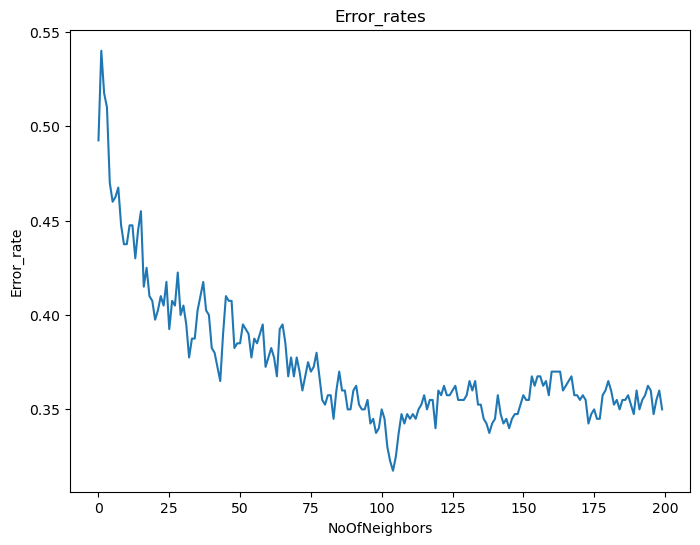

In [405]:
#Select an optimal K value to minimize overfitting.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

error_rates = []
for i in np.arange(1, 201):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_train, y_train)
    new_predictions = new_model.predict(x_test)
    error_rates.append(np.mean(new_predictions != y_test))
    
plt.figure(figsize=(8,6))
plt.title('Error_rates')
plt.ylabel('Error_rate')
plt.xlabel('NoOfNeighbors')
plt.plot(error_rates)

In [388]:
#Train the model and make predictions.
model = KNeighborsClassifier(n_neighbors = 105)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [389]:
#Performance measurement.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       105
           1       0.55      0.69      0.61        91
           2       0.53      0.64      0.58        92
           3       0.90      0.65      0.76       112

    accuracy                           0.68       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.72      0.68      0.69       400

[[78 25  2  0]
 [15 63 13  0]
 [ 0 25 59  8]
 [ 0  1 38 73]]


### Comparing the models

Multi-layer neural network performs with 0.9675 accuracy and K-Nearest Neighbor algorithm performs with 0.68 accuracy. So, between these two models multi-layer neural network is more suitable for the price range prediction.